In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt


In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
# Importing crime csv  

crime_data = pd.read_csv('seattle_prop_crime_rate.csv')
crime_data

,zipcode,prop_crime_rate_per_1k
0,98101,268.746275
1,98102,61.509086
2,98103,62.774477
3,98104,185.596456
4,98105,57.196131
5,98106,51.997918
6,98107,66.512043
7,98108,69.767235
8,98109,87.699296
9,98112,47.076027


In [5]:
# Importing house data csv  

kc_house_data = pd.read_csv('kc_house_data.csv')
kc_house_data.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
kc_house_data["zipcode"].unique

<bound method Series.unique of 0        98178
1        98125
2        98028
3        98136
4        98074
         ...  
21608    98103
21609    98146
21610    98144
21611    98027
21612    98144
Name: zipcode, Length: 21613, dtype: int64>

In [7]:
merged_df = pd.merge(kc_house_data, crime_data, on='zipcode', how='outer')

In [8]:
merged_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,prop_crime_rate_per_1k
0,7.129301e+09,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,1340.0,5650.0,12.565414
1,4.060000e+09,20140623T000000,205425.0,2.0,1.00,880.0,6780.0,1.0,0.0,0.0,...,880.0,0.0,1945.0,0.0,98178,47.5009,-122.248,1190.0,6780.0,12.565414
2,4.058802e+09,20140717T000000,445000.0,3.0,2.25,2100.0,8201.0,1.0,0.0,2.0,...,1620.0,480.0,1967.0,0.0,98178,47.5091,-122.244,2660.0,8712.0,12.565414
3,2.976801e+09,20140925T000000,236000.0,3.0,1.00,1300.0,5898.0,1.0,0.0,0.0,...,1300.0,0.0,1961.0,0.0,98178,47.5053,-122.255,1320.0,7619.0,12.565414
4,6.874201e+09,20150227T000000,170000.0,2.0,1.00,860.0,5265.0,1.0,0.0,0.0,...,860.0,0.0,1931.0,0.0,98178,47.5048,-122.272,1650.0,8775.0,12.565414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98101,NaN,NaN,NaN,NaN,268.746275
21614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98104,NaN,NaN,NaN,NaN,185.596456
21615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98121,NaN,NaN,NaN,NaN,83.881785
21616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,98134,NaN,NaN,NaN,NaN,1482.945168


In [9]:
merged_df.to_csv("merged_df.csv", index=False)

In [21]:
clean_merged_df = merged_df.drop(['id', 'date', 'waterfront', 'view', 'sqft_living15', 'sqft_lot15'], axis=1)
clean_merged_df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,prop_crime_rate_per_1k
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,12.565414
1,205425.0,2.0,1.00,880.0,6780.0,1.0,4.0,6.0,880.0,0.0,1945.0,0.0,98178,47.5009,-122.248,12.565414
2,445000.0,3.0,2.25,2100.0,8201.0,1.0,3.0,8.0,1620.0,480.0,1967.0,0.0,98178,47.5091,-122.244,12.565414
3,236000.0,3.0,1.00,1300.0,5898.0,1.0,3.0,7.0,1300.0,0.0,1961.0,0.0,98178,47.5053,-122.255,12.565414
4,170000.0,2.0,1.00,860.0,5265.0,1.0,3.0,6.0,860.0,0.0,1931.0,0.0,98178,47.5048,-122.272,12.565414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21613,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98101,NaN,NaN,268.746275
21614,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98104,NaN,NaN,185.596456
21615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98121,NaN,NaN,83.881785
21616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98134,NaN,NaN,1482.945168


In [22]:
new_merge_df = clean_merged_df.dropna()
new_merge_df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,prop_crime_rate_per_1k
0,221900.0,3.0,1.00,1180.0,5650.0,1.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178,47.5112,-122.257,12.565414
1,205425.0,2.0,1.00,880.0,6780.0,1.0,4.0,6.0,880.0,0.0,1945.0,0.0,98178,47.5009,-122.248,12.565414
2,445000.0,3.0,2.25,2100.0,8201.0,1.0,3.0,8.0,1620.0,480.0,1967.0,0.0,98178,47.5091,-122.244,12.565414
3,236000.0,3.0,1.00,1300.0,5898.0,1.0,3.0,7.0,1300.0,0.0,1961.0,0.0,98178,47.5053,-122.255,12.565414
4,170000.0,2.0,1.00,860.0,5265.0,1.0,3.0,6.0,860.0,0.0,1931.0,0.0,98178,47.5048,-122.272,12.565414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20757,359800.0,5.0,2.50,2170.0,2752.0,2.0,3.0,8.0,2170.0,0.0,2014.0,0.0,98106,47.5167,-122.347,51.997918
20758,443000.0,3.0,2.50,2430.0,7049.0,2.0,3.0,8.0,2430.0,0.0,2007.0,0.0,98106,47.5399,-122.352,51.997918
20759,249000.0,3.0,2.00,1260.0,1125.0,2.0,3.0,7.0,810.0,450.0,2011.0,0.0,98106,47.5262,-122.361,51.997918
20760,305000.0,2.0,2.50,1590.0,2656.0,2.0,3.0,7.0,1220.0,370.0,2009.0,0.0,98106,47.5489,-122.364,51.997918


In [23]:
# Create our features
X = new_merge_df.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = new_merge_df['price']

In [24]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.15069549 -1.13357488 -0.76457606 -0.07895583 -0.80512464 -0.62076187
  -0.34763304 -0.41568925 -0.83383009  0.02250559 -0.25882343  1.9451431
  -1.45456173  1.8158814  -1.43838127]
 [-1.10191034 -1.13357488 -1.14078044  0.16340441 -0.80512464  0.79513125
  -1.33319062 -0.90875282 -0.83383009 -0.28092823 -0.25882343  1.9451431
  -1.58087673  2.0299626  -1.43838127]
 [-0.15069549  0.44418143  0.38911739  0.46817777 -0.80512464 -0.62076187
   0.63792454  0.30747066  0.28797616  0.38662618 -0.25882343  1.9451431
  -1.48031527  2.1251098  -1.43838127]
 [-0.15069549 -1.13357488 -0.6140943  -0.02576527 -0.80512464 -0.62076187
  -0.34763304 -0.21846382 -0.83383009  0.20456589 -0.25882343  1.9451431
  -1.52691692  1.863455   -1.43838127]
 [-1.10191034 -1.13357488 -1.16586073 -0.1615299  -0.80512464 -0.62076187
  -1.33319062 -0.94162373 -0.83383009 -0.70573558 -0.25882343  1.9451431
  -1.53304872  1.45907941 -1.43838127]]


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
model.score(X_train, y_train)

0.7100025910014397

In [28]:
model.score(X_test, y_test)

0.7090505147638366

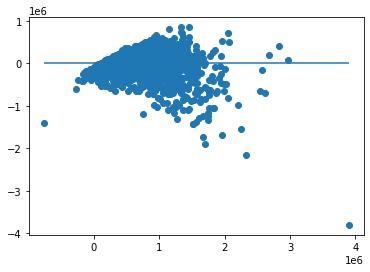

In [29]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [30]:
new_data = new_merge_df.drop(["sqft_lot", "floors", "condition", "sqft_basement", "yr_built", "yr_renovated", "zipcode", "lat","long", "sqft_above"], axis=1)
new_data

,price,bedrooms,bathrooms,sqft_living,grade,prop_crime_rate_per_1k
0,221900.0,3.0,1.00,1180.0,7.0,12.565414
1,205425.0,2.0,1.00,880.0,6.0,12.565414
2,445000.0,3.0,2.25,2100.0,8.0,12.565414
3,236000.0,3.0,1.00,1300.0,7.0,12.565414
4,170000.0,2.0,1.00,860.0,6.0,12.565414
...,...,...,...,...,...,...
20757,359800.0,5.0,2.50,2170.0,8.0,51.997918
20758,443000.0,3.0,2.50,2430.0,8.0,51.997918
20759,249000.0,3.0,2.00,1260.0,7.0,51.997918
20760,305000.0,2.0,2.50,1590.0,7.0,51.997918


In [31]:
# Create our features
X = new_data.drop(columns='price')
# Create our target
#y = cleaned_house_data.loc[:, target].copy()
y = new_data['price']

In [32]:
X = StandardScaler().fit_transform(X)
print(X[0:5])

[[-0.15069549 -1.13357488 -0.76457606 -0.34763304 -1.43838127]
 [-1.10191034 -1.13357488 -1.14078044 -1.33319062 -1.43838127]
 [-0.15069549  0.44418143  0.38911739  0.63792454 -1.43838127]
 [-0.15069549 -1.13357488 -0.6140943  -0.34763304 -1.43838127]
 [-1.10191034 -1.13357488 -1.16586073 -1.33319062 -1.43838127]]


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [34]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
model.score(X_train, y_train)

0.6535031178059385

In [36]:
model.score(X_test, y_test)

0.6362568660791885